# Basic EDA for Sierra's hyperspectral data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spectral import open_image

base_path = "../demo/sierra_data"

In [17]:
# File paths
bil_path = os.path.join(base_path, "images", "K16_C_D.bil") # ['CA0_A_B.bil', 'K16_C_D.bil', 'N100_P100_K100_CA100_C.bil']
hdr_path = bil_path + ".hdr"
calib_path = os.path.join(base_path, "gray_calibration_interpolated.csv")

## Calibration

The OneDrive contains the calibration of the HS camera. For each of the 463 wavelengths, we know the reflectance, we scale each channel accordingly.

In [18]:
def read_calib(calib_path):
    calibration_df = pd.read_csv(calib_path)
    return calibration_df

def apply_calib(image, calib_data):
    calib_values = calib_data['reflectance'].values
    calibrated_image = image * calib_values.reshape(1, 1, -1)
    return calibrated_image

## Read and display an image

In [19]:
# Read HS image and calib
img = open_image(hdr_path).load()
calib = read_calib(calib_path)

# Apply calibration
calib_image = apply_calib(img, calib)

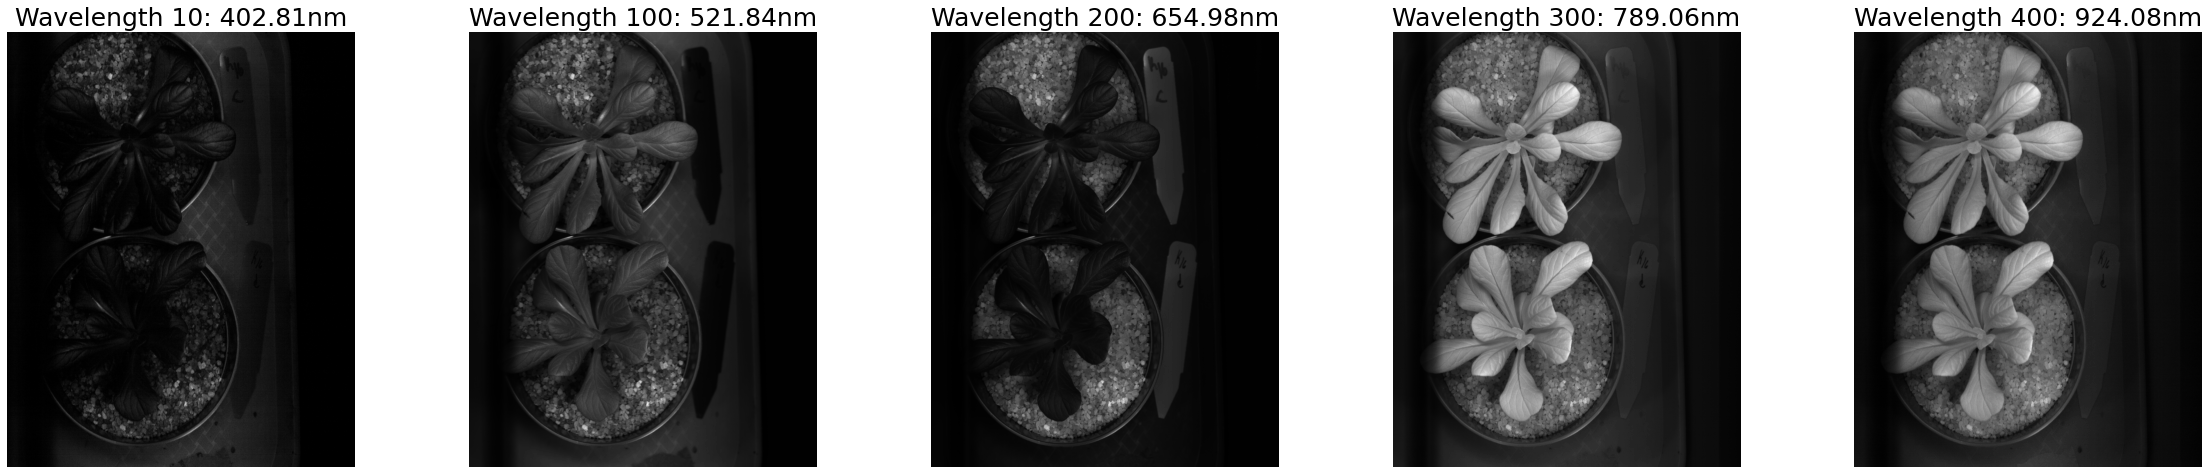

In [20]:
# CHANGE ME! Sample few wavelengths to display (between 0 and 462)
wavelength_indices = [10, 100, 200, 300, 400] 

fig, axes = plt.subplots(1, len(wavelength_indices), figsize=(40, 8))

for i, idx in enumerate(wavelength_indices):
    axes[i].imshow(calib_image[:, :, idx], cmap='gray')
    axes[i].set_title(f"Wavelength {idx}: {calib['wavelength'].iloc[idx]}nm", fontsize = 25)
    axes[i].axis('off')

plt.show()

We can also display an RGB image by manually selecting the channels. Common wavelengths for R, G and B are 630, 532 and 465nm.

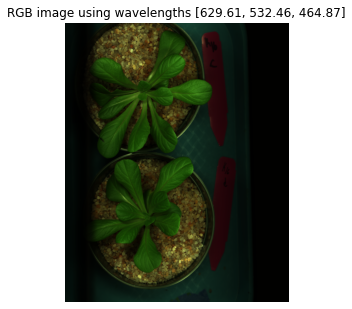

In [21]:
def find_closest_wavelength(wavs, target):
    return (np.abs(np.array(wavs) - np.array(target))).argmin()

# CHANGE ME! Wavelengths to use for RGB image
rgb_targets = [630, 532, 465] 

rgb_wavs = [find_closest_wavelength(calib["wavelength"], wav) for wav in rgb_targets]
rgb_image = calib_image[:, :, rgb_wavs]

# Normalize and plot
rgb_image_norm = rgb_image / rgb_image.max()
plt.figure(figsize=(4,7))
plt.title(f"RGB image using wavelengths {list(calib['wavelength'][rgb_wavs])}")
plt.imshow(rgb_image_norm)
plt.axis("off")
plt.show()